In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="sans-serif",color_codes=True)
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
plt.rcParams["figure.figsize"] = [10,10]
df = pd.read_csv("Salary1.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
label_encoder = preprocessing.LabelEncoder() 
df['workclass']= label_encoder.fit_transform(df['workclass']) 
df['fnlwgt']= label_encoder.fit_transform(df['fnlwgt']) 
df['education']= label_encoder.fit_transform(df['education']) 
df['marital-status']= label_encoder.fit_transform(df['marital-status']) 
df['occupation']= label_encoder.fit_transform(df['occupation']) 
df['relationship']= label_encoder.fit_transform(df['relationship']) 
df['race']= label_encoder.fit_transform(df['race']) 
df['sex']= label_encoder.fit_transform(df['sex']) 
df['native-country']= label_encoder.fit_transform(df['native-country']) 
df['salary']= label_encoder.fit_transform(df['salary']) 

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,2671,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,2926,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,14086,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,15336,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,19355,9,13,2,10,5,2,0,0,0,40,5,0


In [6]:
X = df.drop('salary', axis = 1)
y = np.array(df["salary"])
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
lm = LinearRegression().fit(x_train,y_train)
ridge = Ridge().fit(x_train,y_train)
ridgecv = RidgeCV().fit(x_train,y_train)
lasso = Lasso().fit(x_train,y_train)
rfr = RandomForestRegressor().fit(x_train,y_train)

In [10]:
def get_val_score(model):
    scores = cross_val_score(model, x_train, y_train, scoring="r2")
    print("CV mean: ", np.mean(scores))
    print("CV std: ", np.std(scores))
    print("\n")

In [11]:
get_val_score(lm)

CV mean:  0.2605539665205825
CV std:  0.004582883414221149




In [12]:
get_val_score(lasso)

CV mean:  -0.00022411762750897956
CV std:  0.00024176864718815195




In [13]:
get_val_score(ridge)

CV mean:  0.2605540752023871
CV std:  0.004582932437982547




In [14]:
get_val_score(ridgecv)

CV mean:  0.2605550025424061
CV std:  0.004583375142160328




In [15]:
get_val_score(rfr)

CV mean:  0.44394435611511235
CV std:  0.006680013699694497




In [16]:
param_gridOLS = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_modelOLS  = GridSearchCV(estimator=lm, param_grid=param_gridOLS, n_jobs=-1)
grid_modelOLS.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [17]:
print("Best score", grid_modelOLS.best_score_, "Best parameters", grid_modelOLS.best_params_)

Best score 0.2605539665205825 Best parameters {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [19]:
alpharidge = [0.0001,0.001,0.01,0.1,1,10,100,1000]
param_gridridge = dict(alpha=alpharidge)
grid_modelridge  = GridSearchCV(estimator=ridge, param_grid=param_gridridge, n_jobs=-1)
grid_modelridge .fit(x_train,y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [20]:
print("Best score", grid_modelridge.best_score_, "Best parameters", grid_modelridge.best_params_)

Best score 0.2605593185334487 Best parameters {'alpha': 100}


In [22]:
alphalasso = [0.0001,0.001,0.01,0.1,1,10,100,1000]
param_gridlasso = dict(alpha=alphalasso)
grid_modellasso = GridSearchCV(estimator=lasso, param_grid=param_gridlasso, n_jobs=-1)
grid_modellasso.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [23]:
print("Best score", grid_modellasso.best_score_, "Best parameters", grid_modellasso.best_params_)

Best score 0.2605570251636808 Best parameters {'alpha': 0.0001}


In [24]:
param_gridrfr = {"n_estimators": [2,4,6,8,10,12,14], "max_depth": [2,4,6,8], "min_samples_leaf": [1,2,3,4,5]}
grid_modelrfr = GridSearchCV(estimator=rfr, param_grid=param_gridrfr, n_jobs=-1)
grid_modelrfr.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [2, 4, 6, 8, 10, 12, 14]})

In [25]:
print("Best score", grid_modelrfr.best_score_, "Best parameters", grid_modelrfr.best_params_)

Best score 0.46369313468294865 Best parameters {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 14}


In [32]:
y_predlm = lm.predict(x_test)
y_predlm = pd.DataFrame(y_predlm, columns = ["Ordinary Least Squared"])
y_predridge = ridge.predict(x_test)
y_predridge = pd.DataFrame(y_predridge, columns = ["Ridge"])
y_predridgecv = ridgecv.predict(x_test)
y_predridgecv = pd.DataFrame(y_predridgecv, columns = ["RidgeCV"])
y_predlasso = lasso.predict(x_test)
y_predlasso = pd.DataFrame(y_predlasso, columns = ["Lasso"])
y_predrfr = rfr.predict(x_test)
y_predrfr= pd.DataFrame(y_predrfr, columns = ["Random Forest"])
prediction1 = pd.concat([y_predlm,y_predridge],axis=1)
prediction2 = pd.concat([y_predridgecv,y_predlasso],axis=1)
prediction3 = pd.concat([prediction1,prediction2],axis=1)
prediction4 = pd.concat([prediction3,prediction2],axis=1)
prediction4

,Ordinary Least Squared,Ridge,RidgeCV,Lasso,RidgeCV,Lasso
0,0.099877,0.099877,0.099935,0.100220,0.099935,0.100220
1,0.223420,0.223420,0.223416,0.223309,0.223416,0.223309
2,0.352056,0.352056,0.352010,0.351646,0.352010,0.351646
3,0.208949,0.208949,0.209003,0.208932,0.209003,0.208932
4,0.716132,0.716132,0.715977,0.714854,0.715977,0.714854
...,...,...,...,...,...,...
6508,0.313311,0.313311,0.313354,0.313708,0.313354,0.313708
6509,0.055111,0.055111,0.055141,0.055108,0.055141,0.055108
6510,0.599869,0.599869,0.599742,0.599536,0.599742,0.599536
6511,0.345111,0.345111,0.345103,0.344940,0.345103,0.344940


In [33]:
y_test = pd.DataFrame(y_test, columns = ["Actual"])
y_test

,Actual
0,0
1,0
2,0
3,0
4,1
...,...
6508,1
6509,0
6510,1
6511,0


In [34]:
y_test.mean()

Actual    0.244895
dtype: float64

In [43]:
MAElm = metrics.mean_absolute_error(y_test,y_predlm)
MAEridge = metrics.mean_absolute_error(y_test,y_predridge)
MAEridgecv = metrics.mean_absolute_error(y_test,y_predridgecv)
MAElasso = metrics.mean_absolute_error(y_test,y_predlasso)
MAErfr = metrics.mean_absolute_error(y_test,y_predrfr)
MAEmodel = [[MAElm,MAEridge,MAEridgecv,MAElasso,MAErfr]]
MAEmodeldata = pd.DataFrame(MAEmodel, columns = ("Ordinary Least Squared", "Ridge", "RidgeCV", "Lasso", "Random Forest"), index=["MAE"]).transpose()
MSElm = metrics.mean_squared_error(y_test,y_predlm)
MSEridge = metrics.mean_squared_error(y_test,y_predridge)
MSEridgecv = metrics.mean_squared_error(y_test,y_predridgecv)
MSElasso = metrics.mean_squared_error(y_test,y_predlasso)
MSErfr = metrics.mean_squared_error(y_test,y_predrfr)
MSEmodel = [[MSElm,MSEridge,MSEridgecv,MSElasso,MSErfr]]
MSEmodeldata = pd.DataFrame(MSEmodel, columns = ("Ordinary Least Squared", "Ridge", "RidgeCV", "Lasso", "Random Forest"), index=["MSE"]).transpose()
RMSElm = np.sqrt(MSElm)
RMSEridge = np.sqrt(MSEridge)
RMSEridgecv = np.sqrt(MSEridgecv)
RMSElasso = np.sqrt(MSElasso)
RMSErfr = np.sqrt(MSErfr)
RMSEmodel = [[RMSElm,RMSEridge,RMSEridgecv,RMSElasso,RMSErfr]]
RMSEmodeldata = pd.DataFrame(RMSEmodel, columns = ("Ordinary Least Squared", "Ridge", "RidgeCV", "Lasso", "Random Forest"), index=["RMSE"]).transpose()
R2lm = metrics.r2_score(y_test,y_predlm)
R2ridge = metrics.r2_score(y_test,y_predridge)
R2ridgecv = metrics.r2_score(y_test,y_predridgecv)
R2lasso = metrics.r2_score(y_test,y_predlasso)
R2rfr = metrics.r2_score(y_test,y_predrfr)
R2model = [[R2lm,R2ridge,R2ridgecv,R2lasso,R2rfr]]
R2modeldata = pd.DataFrame(R2model, columns = ("Ordinary Least Squared", "Ridge", "RidgeCV", "Lasso", "Random Forest"), index=["R2"]).transpose()
modelevaluation1 = pd.concat([MAEmodeldata, MSEmodeldata],axis=1)
modelevaluation2 = pd.concat([RMSEmodeldata, R2modeldata],axis=1)
modelevaluation3 = pd.concat([modelevaluation1, modelevaluation2],axis=1)
modelevaluation3

,MAE,MSE,RMSE,R2
Ordinary Least Squared,0.297900,0.137057,0.370212,0.258835
Ridge,0.297900,0.137057,0.370212,0.258835
RidgeCV,0.297904,0.137058,0.370213,0.258831
Lasso,0.297915,0.137057,0.370212,0.258837
Random Forest,0.199218,0.107948,0.328555,0.416246


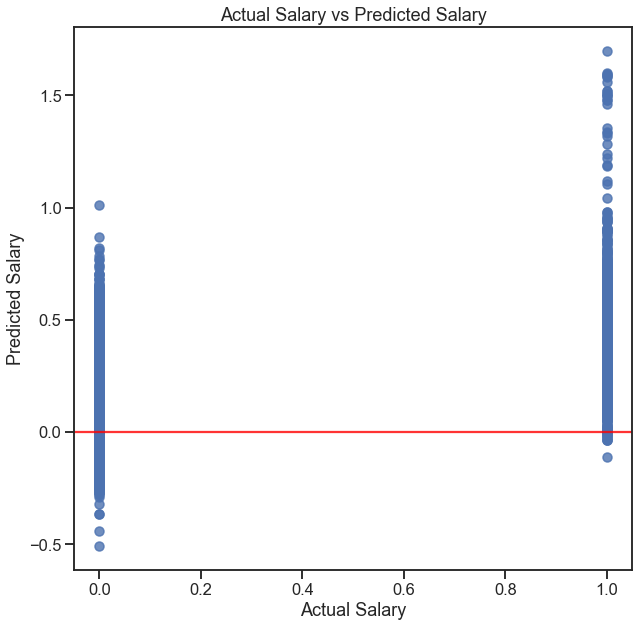

In [46]:
plt.scatter(y_test,y_predridgecv,alpha=0.8)
plt.axhline(color="red",alpha=0.8)
plt.title("Actual Salary vs Predicted Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()